In [46]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

In [53]:
def proxy_plot(file_path):
    with h5py.File(file_path,'r')as f:
        lat = f['Latitude'][:] / 100.0
        lon = f['Longitude'][:] / 100.0 #Scaling down latitude and longitude
        hem = f['HEM'][0]
        hem=np.where((hem<=0) | (hem>200), np.nan, hem)

        India_mask=(lat>=6)&(lat<=37)&(lon>=67)&(lon<=98)  #Masking every other region
        hem_India=np.where(India_mask,hem,np.nan)

        cloud_colours = [
            (0.9,0.9,0.9),
            (0.6,0.8,1.0),
            (0.3,0.6,1.0),
            (0.0,0.3,0.8),
            (0.0,0.1,0.4)
        ]
        cloud_bounds=[0,10,30,70,120,200]
        cloud_cmap=mcolors.LinearSegmentedColormap.from_list("cloud_cmap",cloud_colours)
        cloud_norm=mcolors.BoundaryNorm(cloud_bounds,cloud_cmap.N)

        fig=plt.figure(figsize=(10,8))
        ax=plt.axes(projection=ccrs.PlateCarree())
        ax.set_extent([68,98,6,38], crs=ccrs.PlateCarree())

        ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.add_feature(cfeature.STATES, linewidth=0.3)

        im=ax.pcolormesh(lon,lat,hem_India,cmap=cloud_cmap,norm=cloud_norm,shading='auto')
        plt.colorbar(im, ax=ax, label="Cloud Intensity")
        ax.set_title(f"cloud intensity from INSAT 3DR \n{file_path.split(os.sep)[-1]}")
        plt.tight_layout()
        plt.show()

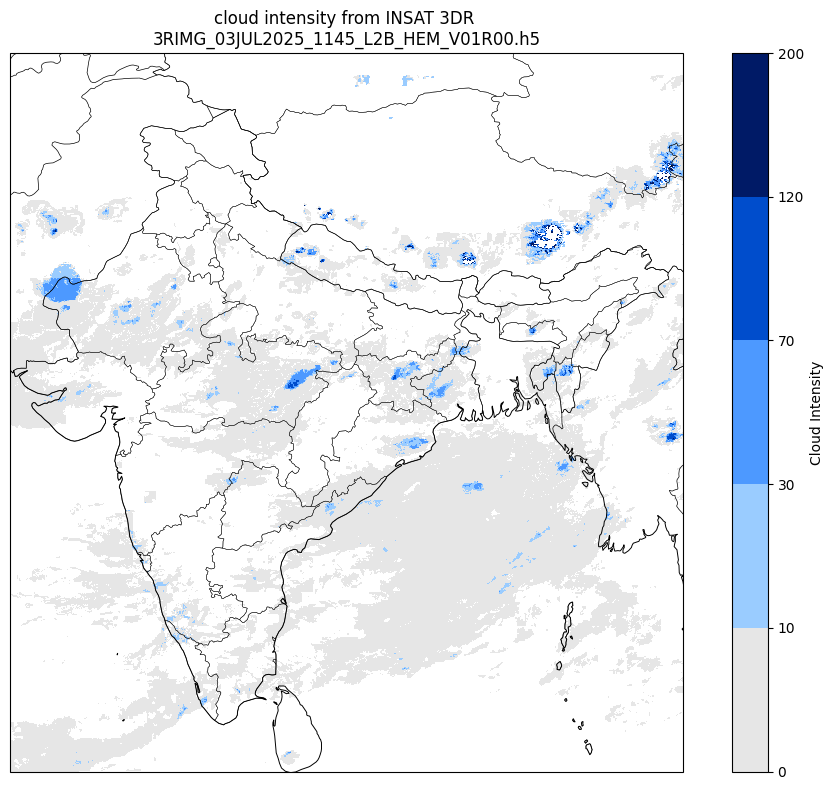

In [54]:
proxy_plot(r"C:\Users\Shantanoo Aher\OneDrive\Documents\Jul25_134207\3RIMG_03JUL2025_1145_L2B_HEM_V01R00.h5")